# **Install & Load Package**

In [245]:
!pip install dalex
!pip install scikit-plot
!pip install shap
!pip install eli5
!pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [246]:
# import pandas for data wrangling
import pandas as pd
# import numpy for vectorize data manipulation
import numpy as np
# import matplotlib.pyplot module for data visualization
import matplotlib.pyplot as plt
import plotly.express as px
palette = {0: 'tab:blue',1: 'tab:orange'}
# import seaborn for data visualization
import seaborn as sns
# import scipy for certain statistical function
from scipy import stats
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# import train and test split method from scikit-learn
from sklearn.model_selection import train_test_split
# import metrics method for model evaluation
import sklearn.metrics as metrics
# import random forest classifier
from sklearn.ensemble import RandomForestClassifier
# import multi-layer perceptron
from sklearn.neural_network import MLPClassifier
# load logistic regression model
from sklearn.linear_model import LogisticRegression
# load linear regression model
from sklearn.linear_model import LinearRegression

# import xgboost classifier
from xgboost import XGBClassifier

# import dalex to explain complex model
import dalex as dx

# load scikit-plot modules
import scikitplot as skplt

#Load label encoder
from sklearn.preprocessing import LabelEncoder

# load shap package for shap explanation
import shap

# load eli5
import eli5

# load LimeTabularExplainer for LIME method
from lime.lime_tabular import LimeTabularExplainer 


# load tree visualization
from sklearn.tree import plot_tree, export_text

# load statsmodel module 
import statsmodels.api as sm
import statsmodels.formula.api as smf

# **Load Dataset**

In [247]:
# load asurance dataset
asurance_data = pd.read_csv("https://raw.githubusercontent.com/hadimaster65555/dataset_for_teaching/main/dataset/car_insurance_fraud_dataset/insuranceFraud.csv")

In [248]:
# check the first 5 data asurance_data
asurance_data.head(5)

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       10/17/2014           OH   
1                 228   42         342868        6/27/2006           IN   
2                 134   29         687698         9/6/2000           OH   
3                 256   41         227811        5/25/1990           IL   
4                 228   44         367455         6/6/2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... witnesses police_report_available total_claim_amount  \
0       466132  ...         2                     YES              71610   
1       468176  ...         0                       ?               5070   
2       430632  ...         3                      NO              34650   
3       608117  ...         2                      NO              63400   
4       610706  ...         1                      NO               6500   

  injury_claim property_claim  vehicle_claim  auto_make auto_model auto_year  \
0         6510          13020          52080       Saab        92x      2004   
1          780            780           3510   Mercedes       E400      2007   
2         7700           3850          23100      Dodge        RAM      2007   
3         6340           6340          50720  Chevrolet      Tahoe      2014   
4         1300            650           4550     Accura        RSX      2009   

  fraud_reported  
0              Y  
1              Y  
2              N  
3              Y  
4              N  

[5 rows x 39 columns]

# **Data Inspection**

In [249]:
# Data Profilling
print("="*10, "Data Profilling","="*10)

#Data Shape
print("Data Shape:", asurance_data.shape)
print("")

#Data Info
print("Data Info:", asurance_data.info)
print("")

#Data Duplication
print("Data Duplikasi:")
print(asurance_data.duplicated().sum())
print("")


========== Data Profilling ==========
Data Shape: (1000, 39)

Data Info: <bound method DataFrame.info of      months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       10/17/2014           OH   
1                   228   42         342868        6/27/2006           IN   
2                   134   29         687698         9/6/2000           OH   
3                   256   41         227811        5/25/1990           IL   
4                   228   44         367455         6/6/2014           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851        7/16/1991           OH   
996                 285   41         186934         1/5/2014           IL   
997                 130   34         918516        2/17/2003           OH   
998                 458   62         533940       11/18/2011           IL   
999                 456   60         556080     

In [250]:
columns_name =[]
unique_value=[]
# Iteration for columns
for col in asurance_data:
  if asurance_data[col].dtype == "object":
    columns_name.append(str(col))
    unique_value.append(asurance_data[col].nunique())
table=pd.DataFrame()
table['Columns'] = columns_name
table['Unique'] = unique_value

table=table.sort_values('Unique', ascending=False)
table

Columns  Unique
15        incident_location    1000
0          policy_bind_date     951
8             incident_date      60
19               auto_model      39
6           insured_hobbies      20
18                auto_make      14
5        insured_occupation      14
4   insured_education_level       7
14            incident_city       7
13           incident_state       7
7      insured_relationship       6
12    authorities_contacted       5
10           collision_type       4
11        incident_severity       4
9             incident_type       4
1              policy_state       3
16          property_damage       3
17  police_report_available       3
2                policy_csl       3
3               insured_sex       2
20           fraud_reported       2

In [251]:
# unique value for object column
obj_col = ['incident_location', 'policy_bind_date', 'incident_date',
           'auto_model', 'insured_hobbies', 'auto_make', 'insured_occupation',
           'insured_education_level', 'incident_city', 'incident_state',
           'insured_relationship', 'authorities_contacted', 'collision_type',
           'incident_severity', 'incident_type', 'policy_state',
           'property_damage','police_report_available','policy_csl',
           'insured_sex', 'fraud_reported']
for col in obj_col:
  print('='*80)
  print(f'Column: {col}')
  print(asurance_data[col].unique())

Column: incident_location
['9935 4th Drive' '6608 MLK Hwy' '7121 Francis Lane' '6956 Maple Drive'
 '3041 3rd Ave' '8973 Washington St' '5846 Weaver Drive' '3525 3rd Hwy'
 '4872 Rock Ridge' '3066 Francis Ave' '1558 1st Ridge' '5971 5th Hwy'
 '6655 5th Drive' '6582 Elm Lane' '6851 3rd Drive' '9573 Weaver Ave'
 '5074 3rd St' '4546 Tree St' '3842 Solo Ridge' '8101 3rd Ridge'
 '5380 Pine St' '8957 Weaver Drive' '2526 Embaracadero Ave'
 '5667 4th Drive' '2502 Apache Hwy' '3418 Texas Lane' '2533 Elm St'
 '3790 Andromedia Hwy' '3220 Rock Drive' '2100 Francis Drive'
 '4687 5th Drive' '9038 2nd Lane' '6092 5th Ave' '8353 Britain Ridge'
 '3540 Maple St' '3104 Sky Drive' '4981 Weaver St' '6676 Tree Lane'
 '3930 Embaracadero St' '3422 Flute St' '4862 Lincoln Hwy' '5719 2nd Lane'
 '3221 Solo Ridge' '6660 MLK Drive' '1699 Oak Drive' '4234 Cherokee Lane'
 '7476 4th St' '8907 Tree Ave' '6619 Flute Ave' '6011 Britain St'
 '5104 Francis Drive' '2280 4th Ave' '2644 Elm Drive' '7466 MLK Ridge'
 '5821 2nd S

Incidenct_location column have unique value dor all rows. In this case, we need to drop this column
policy_bind_date and incident_date columns need to be take down, consider date column not likely have significant impact on prediction if a claim is fraud or not
there are 0 columns of null value, so that we also found columns with '?' (question mark) value on the dataset. we relize this as a missing value
There are no duplication values on this date

# FEATURE ENGINERING & SELECTION 

refer from profiling section, we know that there are columns with the '?' values. we will relize this as a missing values. So that should be real NaN values did not accour on this data

In [252]:
# Count question mark value on dataframe

columns_name =[]
qs_value=[]
#Iteration through the columns
for col in asurance_data:
  if asurance_data[col].dtype == 'object':
        # if 2 or more unique categories
            columns_name.append(str(col))
            qs_value.append((asurance_data[col].values == "?").sum())
  table = pd.DataFrame()
  table['Columns'] = columns_name
  table['QuestionMarks'] = qs_value

  table=table.sort_values('QuestionMarks',ascending=False)
table.head(10)

Columns  QuestionMarks
16          property_damage            360
17  police_report_available            343
10           collision_type            178
11        incident_severity              0
19               auto_model              0
18                auto_make              0
15        incident_location              0
14            incident_city              0
13           incident_state              0
12    authorities_contacted              0

In [253]:
# checking unique on qs_columns
qs_columns = ['property_damage', 'police_report_available', 'collision_type']

for col in qs_columns:
  print('='*10)
  print(f'Columns: {col}')
  print(asurance_data[col].unique())

Columns: property_damage
['YES' '?' 'NO']
Columns: police_report_available
['YES' '?' 'NO']
Columns: collision_type
['Side Collision' '?' 'Rear Collision' 'Front Collision']


In [254]:
#check incident severity
check_damage_df = asurance_data[asurance_data['property_damage'] == '?']
check_damage_df[['property_damage', 'incident_severity']]

property_damage incident_severity
1                 ?      Minor Damage
3                 ?      Major Damage
6                 ?      Minor Damage
7                 ?        Total Loss
16                ?      Major Damage
..              ...               ...
993               ?        Total Loss
994               ?      Minor Damage
997               ?      Minor Damage
998               ?      Major Damage
999               ?      Minor Damage

[360 rows x 2 columns]

In [255]:
# Change to YES for total loss or Major Damage, No for  other severity

asurance_data.loc[asurance_data['incident_severity'] == 'Total Loss', 'property_damage'] = 'YES'
asurance_data.loc[asurance_data['incident_severity'] == 'Major_Damage', 'property_damage'] = 'YES'
asurance_data.loc[asurance_data['property_damage'] == '?', 'property_damage'] = 'NO'

In [256]:
#check replaced values on row
asurance_data[['property_damage', 'incident_severity']].head(10)

property_damage incident_severity
0             YES      Major Damage
1              NO      Minor Damage
2              NO      Minor Damage
3              NO      Major Damage
4              NO      Minor Damage
5              NO      Major Damage
6              NO      Minor Damage
7             YES        Total Loss
8             YES        Total Loss
9             YES        Total Loss

untuk police_report_available kita dapat mengganti data '?' dengan YES, untuk authorities_contacted nilainya adalah Police, dan NO untuk Other di authorities_contacted 

In [257]:
#Check is data authorities_contacted di dalam police
check_police_asurance_data = asurance_data[asurance_data['police_report_available'] == '?']
check_police_asurance_data[['police_report_available', 'authorities_contacted']]

police_report_available authorities_contacted
1                         ?                Police
6                         ?                Police
9                         ?                 Other
10                        ?                Police
20                        ?                Police
..                      ...                   ...
989                       ?                Police
993                       ?                 Other
995                       ?                  Fire
996                       ?                  Fire
999                       ?                Police

[343 rows x 2 columns]

In [258]:
# changes for values '?' to YES for Police contacted, NO for other in authorities_contacted

asurance_data.loc[asurance_data['authorities_contacted'] == 'Police', 'police_report_available'] = 'YES'
asurance_data.loc[asurance_data['authorities_contacted'] != 'Police', 'police_report_available'] = 'NO'

In [259]:
# Check replacement
asurance_data[['police_report_available', 'authorities_contacted']].head(10)

police_report_available authorities_contacted
0                     YES                Police
1                     YES                Police
2                     YES                Police
3                     YES                Police
4                      NO                  None
5                      NO                  Fire
6                     YES                Police
7                     YES                Police
8                     YES                Police
9                      NO                 Other

In [260]:
#Check ? values collision type

check_collisoion_df = asurance_data[asurance_data['collision_type'] == '?']
check_collisoion_df['collision_type']


1      ?
4      ?
13     ?
26     ?
27     ?
      ..
964    ?
969    ?
983    ?
994    ?
999    ?
Name: collision_type, Length: 178, dtype: object

In [261]:
# Change ? with NO column collision

asurance_data.loc[asurance_data['collision_type'] == '?' , 'collision_type'] = 'No Collision'

In [262]:
asurance_data['collision_type'].head()

0     Side Collision
1       No Collision
2     Rear Collision
3    Front Collision
4       No Collision
Name: collision_type, dtype: object

In [263]:
# Count question mark value on dataframe

columns_name =[]
qs_value=[]
#Iteration through the columns
for col in asurance_data:
  if asurance_data[col].dtype == 'object':
        # if 2 or more unique categories
            columns_name.append(str(col))
            qs_value.append((asurance_data[col].values == "?").sum())
  table = pd.DataFrame()
  table['Columns'] = columns_name
  table['QuestionMarks'] = qs_value

  table=table.sort_values('QuestionMarks',ascending=False)
table.head(10)

Columns  QuestionMarks
0          policy_bind_date              0
11        incident_severity              0
19               auto_model              0
18                auto_make              0
17  police_report_available              0
16          property_damage              0
15        incident_location              0
14            incident_city              0
13           incident_state              0
12    authorities_contacted              0

In [264]:
# checking unique on qs_columns
qs_columns = ['property_damage', 'police_report_available', 'collision_type']

for col in qs_columns:
  print('='*10)
  print(f'Columns: {col}')
  print(asurance_data[col].unique())

Columns: property_damage
['YES' 'NO']
Columns: police_report_available
['YES' 'NO']
Columns: collision_type
['Side Collision' 'No Collision' 'Rear Collision' 'Front Collision']


Material Related transformation

The reason have to include martial status due to insured have a family (either spouse or child), the insured tends to be careful since they have someone to take care of.

In [265]:
#check relationship nique value
asurance_data['insured_relationship'].unique()

array(['husband', 'other-relative', 'own-child', 'unmarried', 'wife',
       'not-in-family'], dtype=object)

In [266]:
#Change husband, Wife, and own-child to married
# Unmaried, Not In Fmily, and other relative to Single

asurance_data['insured_relationship'] = asurance_data['insured_relationship'].replace({'husband': 'Married',
'wife':'Married', 'own-child':'Married', 'unmarried':'Single',
'not-in-family':'Single', 'other-relative':'Single'})

Education levels for transformation

Education background need to be transformed and devide each level which concern abaout traffic nulls or else

In [267]:
#Check education unique values
asurance_data['insured_education_level'].unique()

array(['MD', 'PhD', 'Associate', 'Masters', 'High School', 'College',
       'JD'], dtype=object)

In [268]:
# changes High school, College, Associate to first since first step
# master, MD, JD and  PhD to second since second step

asurance_data['insured_education_level'] = asurance_data['insured_education_level'].replace({
    'High School': 'First', 'College': 'First',
    'Associate': 'First', 'Masters': 'Second',
    'JD': 'Second','MD':'Second','PhD':'Second'})

# Hobbies related transformation

Hobbies category need to transfomed by dived healthy category and enjoy category

In [269]:
#check hobbies unique values

In [270]:
asurance_data['insured_hobbies'].unique()

array(['sleeping', 'reading', 'board-games', 'bungie-jumping',
       'base-jumping', 'golf', 'camping', 'dancing', 'skydiving',
       'movies', 'hiking', 'yachting', 'paintball', 'chess', 'kayaking',
       'polo', 'basketball', 'video-games', 'cross-fit', 'exercise'],
      dtype=object)

In [271]:
# Make a group/list based on healthy activity
healthy = ['bungie-jumping', 'base-jumping', 'golf', 'camping', 'skydiving', 'hiking', 'paintball',
           'kayaking', 'polo', 'basketball', 'cross-fit', 'exercise']

In [272]:
#Change the values into related hobbies
asurance_data['insured_hobbies'] = np.where(asurance_data['insured_hobbies'].isin(healthy), 'healthy', 'enjoyable')

# Occupation related for transformation

In [273]:
# check Occupation unique values
asurance_data['insured_occupation'].unique()

array(['craft-repair', 'machine-op-inspct', 'sales', 'armed-forces',
       'tech-support', 'prof-specialty', 'other-service',
       'priv-house-serv', 'exec-managerial', 'protective-serv',
       'transport-moving', 'handlers-cleaners', 'adm-clerical',
       'farming-fishing'], dtype=object)

In [274]:
#Make a group in list due to category company
industry = ['craft-repair', 'machine-op-inspct',
       'tech-support', 'prof-specialty', 
       'protective-serv',
       'transport-moving']
Office = ['sales', 'exec-managerial', 'adm-clerical']
service = ['armed-forces', 'other-service', 'priv-house-serv', 'handlers-cleaners', 'farming-fishing']

In [275]:
#chenges the values into related category company
asurance_data['insured_occupation'] = np.where(asurance_data['insured_occupation'].isin(industry), 'industry', asurance_data['insured_occupation'])
asurance_data['insured_occupation'] = np.where(asurance_data['insured_occupation'].isin(Office), 'Office', asurance_data['insured_occupation'])
asurance_data['insured_occupation'] = np.where(asurance_data['insured_occupation'].isin(service), 'service', asurance_data['insured_occupation'])

# Drop for columns not used

1. We sould to drop variable geography values such as : incident location, incident city, incident state, policy state, insured zip cuased there dont have impact either correlation with our issue.

In [276]:
# Drop geograpy columns
asurance_data = asurance_data.drop(['incident_location', 'incident_city', 'incident_state',
                               'policy_state', 'insured_zip'], axis=1)

2. Drop columns contain type or kind of the car that listed on insurance. The variable don have correlation in domain knowladge for kind of car, we suggest that value data such as accident, speck of car (speed limited), type of tires, category machines and etc.

In [277]:
# Drop type or kind car columns
asurance_data = asurance_data.drop(['auto_model', 'auto_make', 'auto_year'], axis=1)

3. Drop columns contain date as policy bind date, incident date. Notes ; Still used incident hours can be impact like day or night hours window.

In [278]:
# Drop columns with values has date variable
asurance_data = asurance_data.drop(['policy_bind_date', 'incident_date'], axis=1)

4. Drop columns contain have sump up values into one column caused have most likely high correlation

In [279]:
asurance_data = asurance_data.drop(['injury_claim', 'property_claim', 'vehicle_claim'], axis=1)

5. Drop policy number same as insurance id and policy csl dont have correlation abaout limits which try to take all sum up money.

In [280]:
# Drop not correlation business knowladge 
asurance_data = asurance_data.drop(['policy_number', 'policy_csl'], axis=1)

In [281]:
asurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_deductable            1000 non-null   int64  
 3   policy_annual_premium        1000 non-null   float64
 4   umbrella_limit               1000 non-null   int64  
 5   insured_sex                  1000 non-null   object 
 6   insured_education_level      1000 non-null   object 
 7   insured_occupation           1000 non-null   object 
 8   insured_hobbies              1000 non-null   object 
 9   insured_relationship         1000 non-null   object 
 10  capital-gains                1000 non-null   int64  
 11  capital-loss                 1000 non-null   int64  
 12  incident_type                1000 non-null   object 
 13  collision_type     

## Exploration Data Analysis with visualization

In [282]:
# Changes data bollean in column fraud report
# 1 : Fraud Data
# 0 : No Fraud Data
# data.drop(['DOMISILI','KODE_DONATUR','STATUS'], axis=1, inplace=True)
dictfraud = {"fraud_reported": {"N": 0, "Y": 1}}
asurance_data = asurance_data.replace(dictfraud)

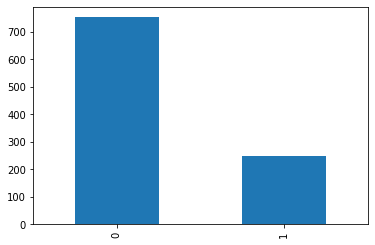

In [283]:
# check target fraud distribution
asurance_data['fraud_reported'].value_counts().plot(kind = 'bar')

Data dari fraud report yang memiliki distribusi data paling banyak dimiliki data not fraud dibanding data fraud

In [284]:
# Martial counts exploration
Status = asurance_data['insured_relationship'].value_counts()

fig = px.pie(Status,
             values = Status.values,
             names = Status.index,
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label',
                  marker = dict(line = dict(color = 'white', width = 1)))
fig.show()

Insight : Insured customer have slightyl diference in terms of relationship, married most dominand that single

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



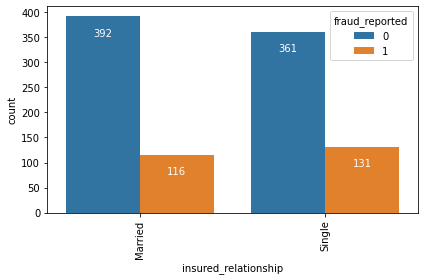

In [285]:
 # Martial status vs fraud
 ax = sns.countplot(asurance_data['insured_relationship'], hue=asurance_data['fraud_reported'], palette=palette, order = asurance_data['insured_relationship'].value_counts().index)
 for p in ax.patches:
   ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=10)
plt.xticks(rotation=90)
plt.tight_layout();

Insight: Single have more risk for fraud than married insured

In [286]:
# education counts exploration
Education = asurance_data['insured_education_level'].value_counts()

fig = px.pie(Status,
             values = Education.values,
             names = Education.index,
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label',
                  marker = dict(line = dict(color = 'white', width = 1)))
fig.show()

Insight : customer in second level more dominand thant customer first education level

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



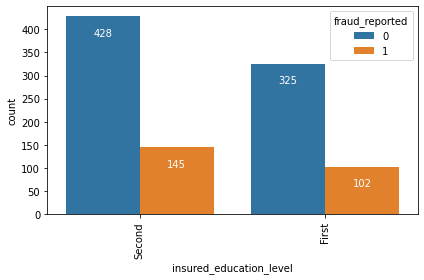

In [287]:
 # Education status vs fraud
 ax = sns.countplot(asurance_data['insured_education_level'], hue=asurance_data['fraud_reported'], palette=palette, order = asurance_data['insured_education_level'].value_counts().index)
 for p in ax.patches:
   ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=10)
plt.xticks(rotation=90)
plt.tight_layout();

Insight: customer with second education level have more risk for fraud than first education level. Data distribution also more higher in second education level

In [288]:
# Hobbies counts exploration
Hobby = asurance_data['insured_hobbies'].value_counts()

fig = px.pie(Status,
             values = Hobby.values,
             names = Hobby.index,
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label',
                  marker = dict(line = dict(color = 'white', width = 1)))
fig.show()

Insight : customers which have healthy hobbies more dominand thant customers which enjoyable hobbies

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



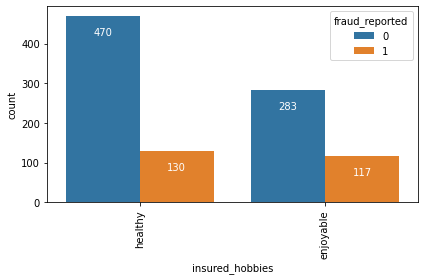

In [289]:
 # Hobbies status vs fraud
 ax = sns.countplot(asurance_data['insured_hobbies'], hue=asurance_data['fraud_reported'], palette=palette, order = asurance_data['insured_hobbies'].value_counts().index)
 for p in ax.patches:
   ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=10)
plt.xticks(rotation=90)
plt.tight_layout();

Insight: customer with healty hobbies have more risk for fraud than first enjoyable hobbies. Data distribution also more higher in healthly hobbies

In [290]:

# occupation counts exploration
occupation = asurance_data['insured_occupation'].value_counts()

fig = px.pie(Status,
             values = occupation.values,
             names = occupation.index,
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label',
                  marker = dict(line = dict(color = 'white', width = 1)))
fig.show()

Insight : customers which have company industry segment more dominand thant customers which service and Office segment in their jobs

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



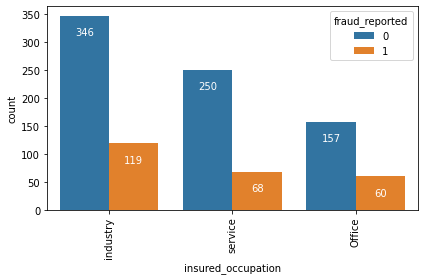

In [291]:
 # occupation status vs fraud
 ax = sns.countplot(asurance_data['insured_occupation'], hue=asurance_data['fraud_reported'], palette=palette, order = asurance_data['insured_occupation'].value_counts().index)
 for p in ax.patches:
   ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=10)
plt.xticks(rotation=90)
plt.tight_layout();

Insight: customer with jobs in industry company have more risk for fraud than service and office jobs. Truelly, Data distribution also more higher in Industry Company that makes sanse as data linear

In [292]:
# count 'fraud_reported' class frequencies
asurance_data['fraud_reported'].value_counts()

0    753
1    247
Name: fraud_reported, dtype: int64

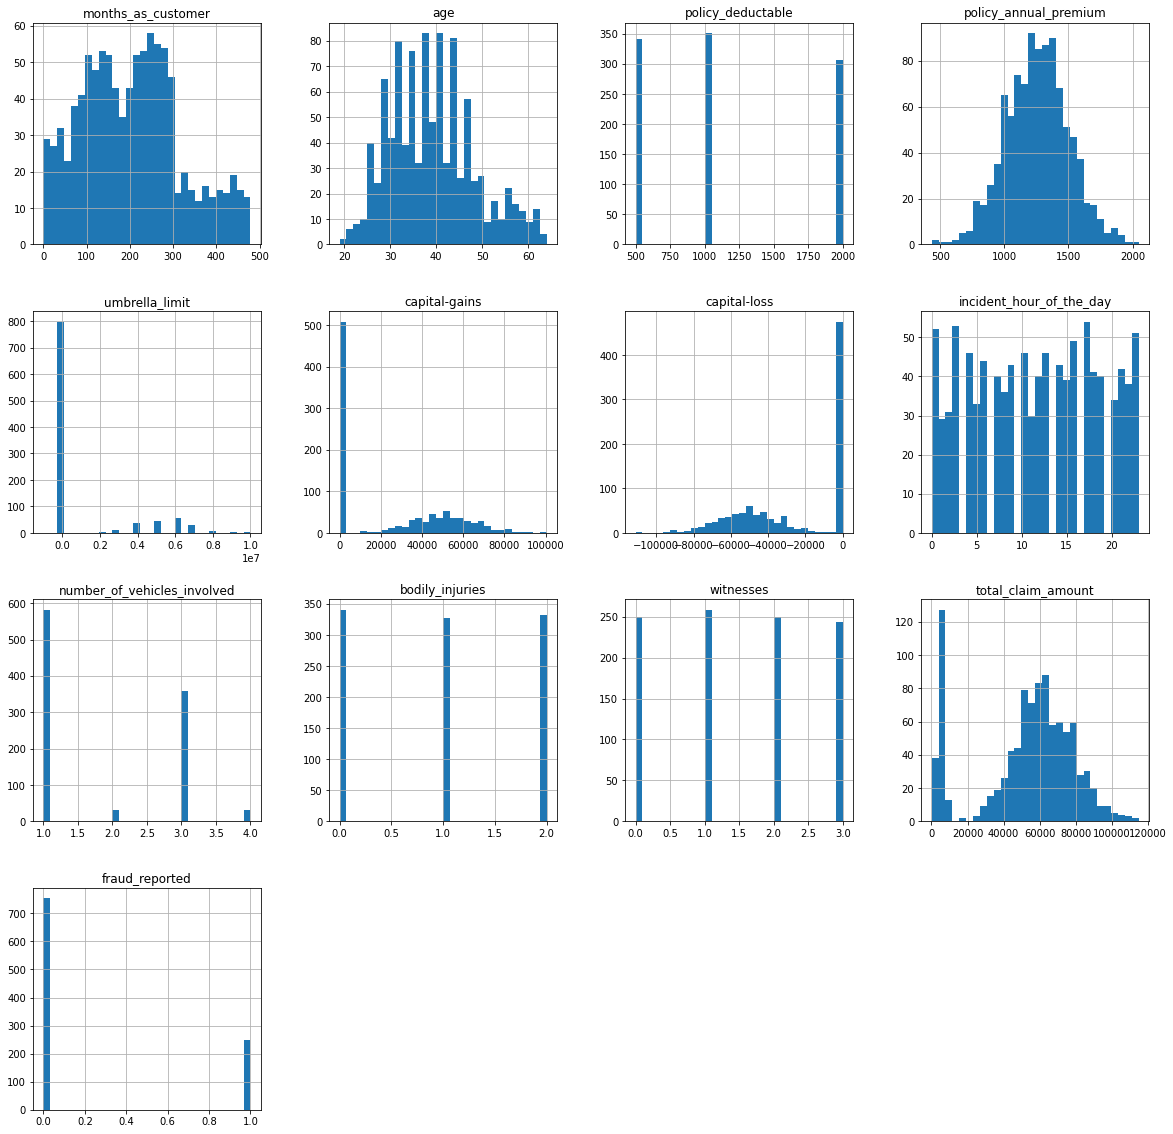

In [293]:
# check numerical data distribution
asurance_data.hist(bins=30, figsize = (20, 20));

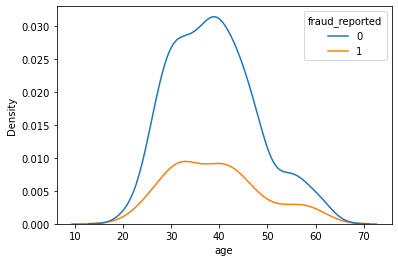

In [294]:
#
sns.kdeplot(data=asurance_data, x="age", hue="fraud_reported")

# **Feature Encoding**

In [295]:
cats = asurance_data.select_dtypes('object')

In [296]:
cats.columns

Index(['insured_sex', 'insured_education_level', 'insured_occupation',
       'insured_hobbies', 'insured_relationship', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'property_damage', 'police_report_available'],
      dtype='object')

In [297]:
le = LabelEncoder()

In [298]:
asurance_data['insured_sex']=le.fit_transform(asurance_data['insured_sex'])
asurance_data['insured_education_level']=le.fit_transform(asurance_data['insured_education_level'])
asurance_data['insured_occupation']=le.fit_transform(asurance_data['insured_occupation'])
asurance_data['insured_hobbies']=le.fit_transform(asurance_data['insured_hobbies'])
asurance_data['insured_relationship']=le.fit_transform(asurance_data['insured_relationship'])
asurance_data['incident_type']=le.fit_transform(asurance_data['incident_type'])
asurance_data['incident_severity']=le.fit_transform(asurance_data['incident_severity'])
asurance_data['authorities_contacted']=le.fit_transform(asurance_data['authorities_contacted'])
asurance_data['property_damage']=le.fit_transform(asurance_data['property_damage'])
asurance_data['police_report_available']=le.fit_transform(asurance_data['police_report_available'])
asurance_data['collision_type']=le.fit_transform(asurance_data['collision_type'])

In [299]:
asurance_data.sample(5)

months_as_customer  age  policy_deductable  policy_annual_premium  \
286                 163   31               1000                1004.63   
518                 196   41               2000                1800.76   
781                  70   29               1000                1425.79   
516                  65   27               1000                1164.97   
777                 239   40                500                1463.95   

     umbrella_limit  insured_sex  insured_education_level  insured_occupation  \
286         6000000            1                        1                   2   
518               0            1                        1                   1   
781               0            0                        1                   2   
516               0            0                        0                   0   
777               0            0                        1                   0   

     insured_hobbies  insured_relationship  ...  incident_severity  \
286                1                     1  ...                  2   
518                1                     1  ...                  1   
781                0                     1  ...                  1   
516                1                     0  ...                  2   
777                1                     0  ...                  2   

     authorities_contacted  incident_hour_of_the_day  \
286                      0                        14   
518                      0                         0   
781                      0                        12   
516                      0                        17   
777                      4                        20   

     number_of_vehicles_involved  property_damage  bodily_injuries  witnesses  \
286                            3                1                2          0   
518                            3                0                1          0   
781                            1                0                0          3   
516                            1                1                1          2   
777                            3                1                0          0   

     police_report_available  total_claim_amount  fraud_reported  
286                        0               63910               0  
518                        0               47800               0  
781                        0               69360               0  
516                        0               42840               0  
777                        1               69740               0  

[5 rows x 24 columns]

In [300]:
asurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_deductable            1000 non-null   int64  
 3   policy_annual_premium        1000 non-null   float64
 4   umbrella_limit               1000 non-null   int64  
 5   insured_sex                  1000 non-null   int64  
 6   insured_education_level      1000 non-null   int64  
 7   insured_occupation           1000 non-null   int64  
 8   insured_hobbies              1000 non-null   int64  
 9   insured_relationship         1000 non-null   int64  
 10  capital-gains                1000 non-null   int64  
 11  capital-loss                 1000 non-null   int64  
 12  incident_type                1000 non-null   int64  
 13  collision_type     

In [301]:
# cretate predictor variables as X
X = asurance_data.drop(['fraud_reported'], axis = 1)
# create target data as y
y = asurance_data['fraud_reported']

In [302]:
#Check dimension
y.value_counts(normalize=True)

0    0.753
1    0.247
Name: fraud_reported, dtype: float64

In [303]:
print('X shape:', X.shape)
print('y shape:', y.shape)

X shape: (1000, 23)
y shape: (1000,)


In [304]:
#Split data to train and test data
# with test size 20% of over data
#used startified sampling
# Set randomstate = 1000
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,stratify = y,random_state = 1000)

In [407]:
#make a new dataframe from train and test data
train_x =pd.DataFrame(X_train, columns=asurance_data.drop(['fraud_reported'], axis = 1).columns)
train_y =pd.DataFrame(y_train, columns=['fraud_reported'])
train_df = pd.concat([train_x, train_y], axis=1)

test_x = pd.DataFrame(X_test, columns=asurance_data.drop(['fraud_reported'], axis = 1).columns)
test_y =pd.DataFrame(y_test, columns=['fraud_reported'])
test_df = pd.concat([test_x, test_y], axis=1)

In [410]:
train_df

months_as_customer   age  policy_deductable  policy_annual_premium  \
327                 276  47.0               1000                1724.09   
948                 126  31.0               1000                1328.26   
252                 242  40.0                500                1238.65   
971                  79  25.0                500                1863.04   
994                 141  30.0               1000                1347.04   
..                  ...   ...                ...                    ...   
127                 165  32.0                500                1399.26   
705                 274  45.0               1000                1353.53   
244                  95  28.0               1000                 773.99   
979                 229  37.0               1000                1331.94   
743                 175  39.0                500                1359.36   

     umbrella_limit  insured_sex  insured_education_level  insured_occupation  \
327             0.0            1                        1                   1   
948             0.0            1                        1                   0   
252             0.0            0                        0                   1   
971             0.0            0                        0                   2   
994             0.0            1                        0                   0   
..              ...          ...                      ...                 ...   
127             0.0            0                        0                   1   
705             0.0            0                        1                   1   
244             0.0            1                        0                   2   
979             0.0            0                        1                   2   
743             0.0            1                        1                   0   

     insured_hobbies  insured_relationship  ...  incident_severity  \
327                0                     0  ...                  1   
948                1                     1  ...                  2   
252                1                     0  ...                  3   
971                1                     1  ...                  2   
994                1                     0  ...                  1   
..               ...                   ...  ...                ...   
127                1                     0  ...                  1   
705                1                     1  ...                  1   
244                0                     1  ...                  3   
979                1                     1  ...                  2   
743                1                     0  ...                  0   

     authorities_contacted  incident_hour_of_the_day  \
327                      4                        23   
948                      4                        17   
252                      4                         5   
971                      1                         0   
994                      2                         6   
..                     ...                       ...   
127                      4                         9   
705                      0                        13   
244                      2                         3   
979                      3                        17   
743                      3                         9   

     number_of_vehicles_involved  property_damage  bodily_injuries  witnesses  \
327                            3                1                0          0   
948                            1                1                1          1   
252                            1                1                1          1   
971                            1                1                2          1   
994                            1                0                1          2   
..                           ...              ...              ...        ...   
127                            1                0 

In [411]:
test_df

months_as_customer  age  policy_deductable  policy_annual_premium  \
150                 134   32               1000                1000.06   
730                 116   31                500                1194.83   
227                 343   52               1000                1053.02   
885                 254   45                500                1083.64   
615                 153   34                500                 991.39   
..                  ...  ...                ...                    ...   
201                 342   49                500                1722.95   
267                  35   29               2000                 653.66   
754                  54   35                500                1261.28   
3                   256   41               2000                1415.74   
249                  94   30               2000                1025.54   

     umbrella_limit  insured_sex  insured_education_level  insured_occupation  \
150               0            0                        1                   2   
730               0            0                        1                   1   
227               0            0                        0                   1   
885               0            1                        1                   2   
615               0            1                        0                   1   
..              ...          ...                      ...                 ...   
201               0            1                        1                   1   
267               0            0                        1                   2   
754               0            0                        1                   1   
3           6000000            0                        1                   2   
249               0            0                        0                   2   

     insured_hobbies  insured_relationship  ...  incident_severity  \
150                1                     0  ...                  2   
730                1                     0  ...                  0   
227                1                     1  ...                  0   
885                1                     0  ...                  2   
615                1                     1  ...                  2   
..               ...                   ...  ...                ...   
201                1                     1  ...                  1   
267                0                     1  ...                  1   
754                1                     1  ...                  1   
3                  0                     1  ...                  0   
249                1                     1  ...                  0   

     authorities_contacted  incident_hour_of_the_day  \
150                      3                        17   
730                      4                        23   
227                      3                         2   
885                      4                        19   
615                      3                         0   
..                     ...                       ...   
201                      1                         3   
267                      1                        22   
754                      1                        21   
3                        4                         5   
249                      1                        19   

     number_of_vehicles_involved  property_damage  bodily_injuries  witnesses  \
150                            1                1                1          0   
730                            1                0                0          0   
227                            1                0                0          2   
885                            3                1                0          0   
615                            3                1                1          0   
..                           ...              ...              ...        ...   
201                            1                0             

In [412]:
# pull numerical column
var_name = X_train.select_dtypes(include = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning

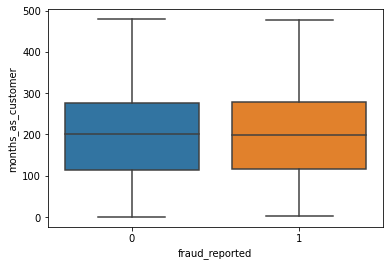

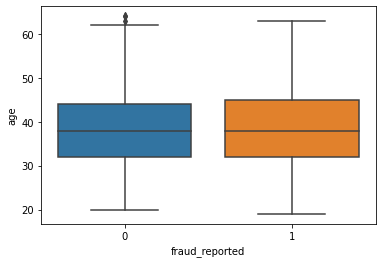

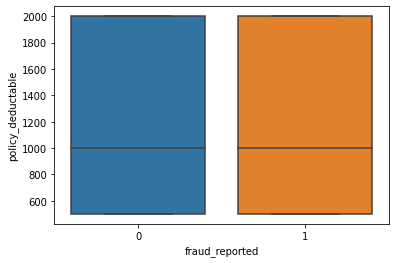

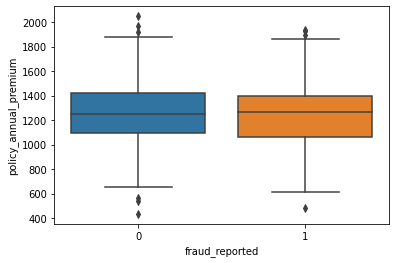

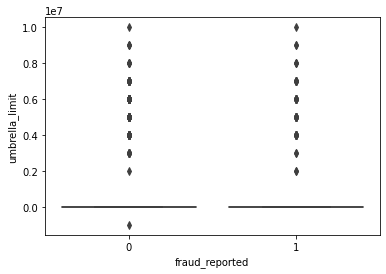

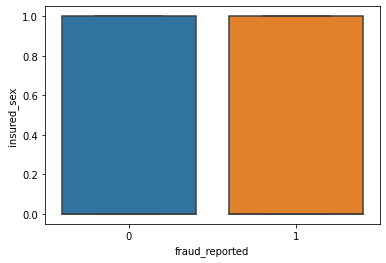

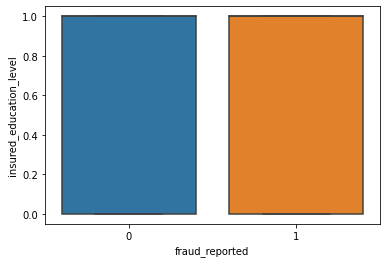

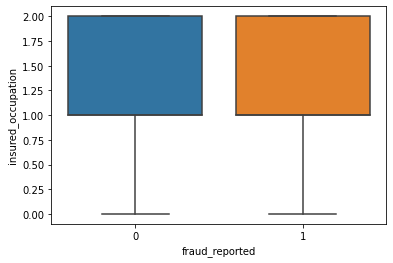

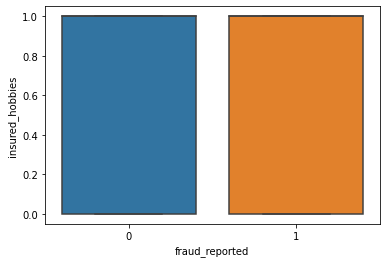

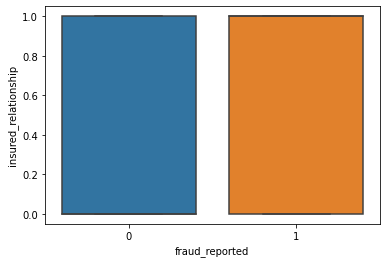

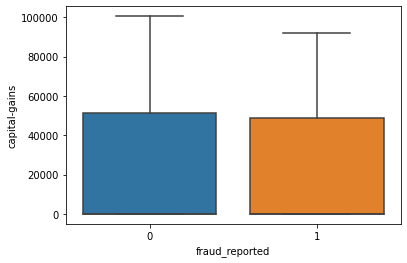

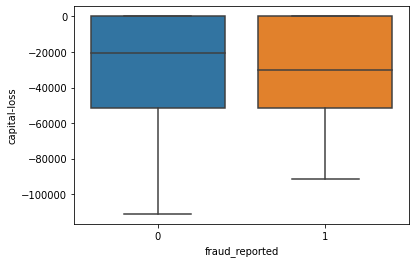

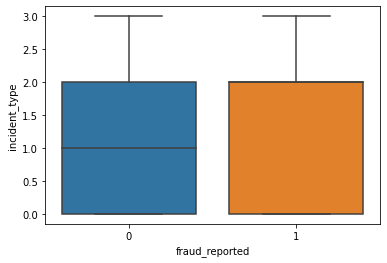

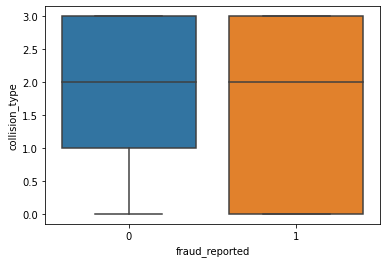

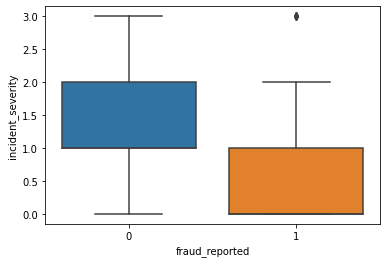

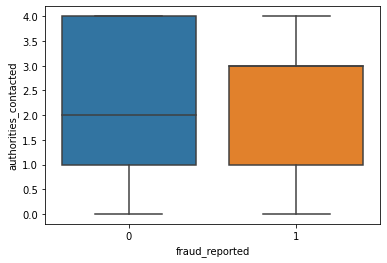

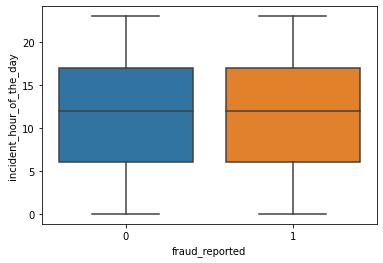

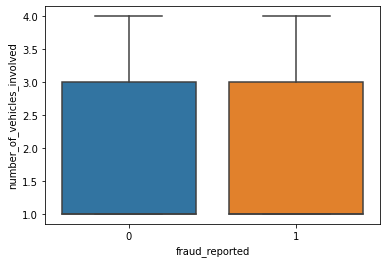

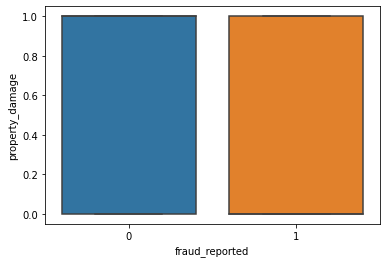

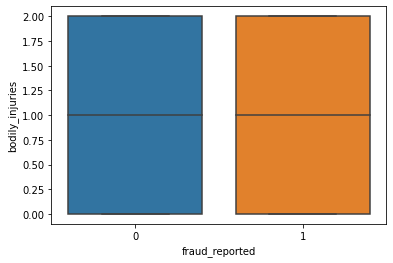

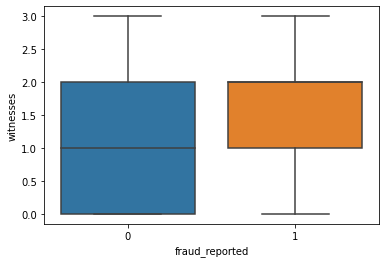

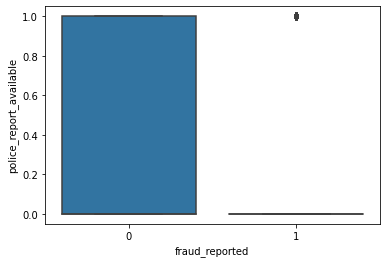

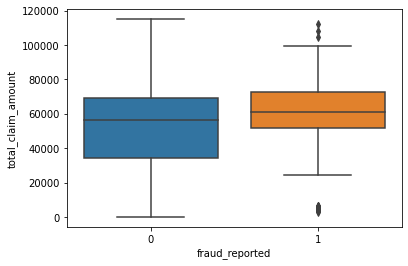

In [413]:
# plot box plot analyst for easier to handle outlier and data distribution each variable/feature
for col_names in var_name:
  plt.figure()
  sns.boxplot(x = y, y = X[col_names]);

Insight : The above visualization data shows that which have normal distribution are age, policy annual premium, capital gains, capital loss, total claims amount, 

In [414]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 327 to 743
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           800 non-null    int64  
 1   age                          800 non-null    float64
 2   policy_deductable            800 non-null    int64  
 3   policy_annual_premium        800 non-null    float64
 4   umbrella_limit               800 non-null    float64
 5   insured_sex                  800 non-null    int64  
 6   insured_education_level      800 non-null    int64  
 7   insured_occupation           800 non-null    int64  
 8   insured_hobbies              800 non-null    int64  
 9   insured_relationship         800 non-null    int64  
 10  capital-gains                800 non-null    int64  
 11  capital-loss                 800 non-null    int64  
 12  incident_type                800 non-null    int64  
 13  collision_type    

Remove outlier from data

In [312]:
outlier_col = ['months_as_customer', 'age', 'policy_annual_premium', 'umbrella_limit', 'capital-gains', 'capital-loss', 
               'total_claim_amount']
for col in outlier_col:
  Q1 = X_train[col].quantile(0.25)
  Q3 = X_train[col].quantile(0.75)
  IQR = Q3 - Q1
  Lwishker = Q1 - 1.5 * IQR
  Uwishker = Q3 + 1.5 * IQR
  X_train[col] = X_train[col].clip(Lwishker, Uwishker)

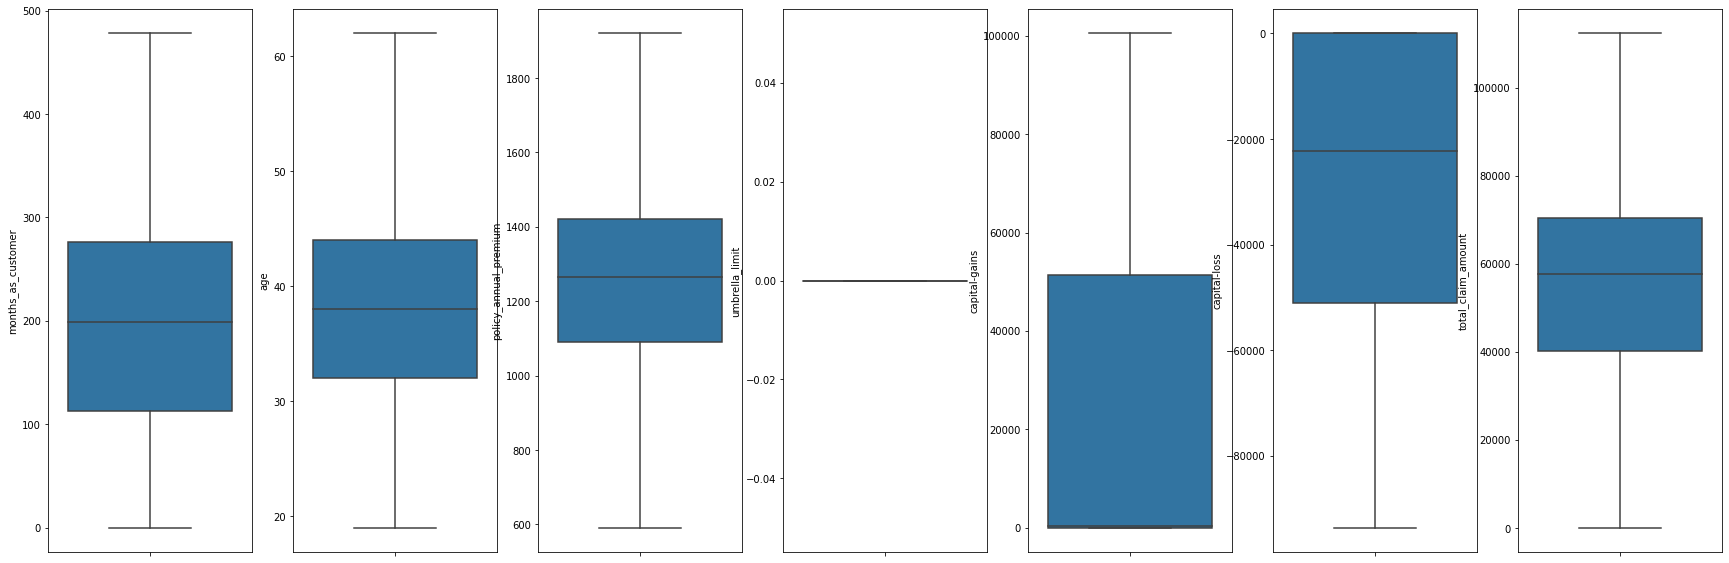

In [415]:
fig, axis = plt.subplots(1, 7, figsize=(30, 10))

ax = sns.boxplot(y=train_df['months_as_customer'], ax=axis[0])
ax = sns.boxplot(y=train_df['age'], ax=axis[1])
ax = sns.boxplot(y=train_df['policy_annual_premium'], ax=axis[2])
ax = sns.boxplot(y=train_df['umbrella_limit'], ax=axis[3])
ax = sns.boxplot(y=train_df['capital-gains'], ax=axis[4])
ax = sns.boxplot(y=train_df['capital-loss'], ax=axis[5])
ax = sns.boxplot(y=train_df['total_claim_amount'], ax=axis[6])                               

NORMALIZATION

some feature that have numerical feature with high value

In [417]:
from sklearn.preprocessing import MinMaxScaler
col_trans = asurance_data.columns
scaler = MinMaxScaler()
train_df[col_trans]= scaler.fit_transform(train_df[col_trans])
X_trans_test = scaler.transform(test_df[col_trans])

In [418]:
# check train_data
train_df

months_as_customer       age  policy_deductable  policy_annual_premium  \
327            0.577406  0.651163           0.333333               0.852575   
948            0.263598  0.279070           0.333333               0.554634   
252            0.506276  0.488372           0.000000               0.487184   
971            0.165272  0.139535           0.000000               0.957163   
994            0.294979  0.255814           0.333333               0.568770   
..                  ...       ...                ...                    ...   
127            0.345188  0.302326           0.000000               0.608076   
705            0.573222  0.604651           0.333333               0.573655   
244            0.198745  0.209302           0.333333               0.137435   
979            0.479079  0.418605           0.333333               0.557404   
743            0.366109  0.465116           0.000000               0.578043   

     umbrella_limit  insured_sex  insured_education_level  insured_occupation  \
327             0.0          1.0                      1.0                 0.5   
948             0.0          1.0                      1.0                 0.0   
252             0.0          0.0                      0.0                 0.5   
971             0.0          0.0                      0.0                 1.0   
994             0.0          1.0                      0.0                 0.0   
..              ...          ...                      ...                 ...   
127             0.0          0.0                      0.0                 0.5   
705             0.0          0.0                      1.0                 0.5   
244             0.0          1.0                      0.0                 1.0   
979             0.0          0.0                      1.0                 1.0   
743             0.0          1.0                      1.0                 0.0   

     insured_hobbies  insured_relationship  ...  incident_severity  \
327              0.0                   0.0  ...           0.333333   
948              1.0                   1.0  ...           0.666667   
252              1.0                   0.0  ...           1.000000   
971              1.0                   1.0  ...           0.666667   
994              1.0                   0.0  ...           0.333333   
..               ...                   ...  ...                ...   
127              1.0                   0.0  ...           0.333333   
705              1.0                   1.0  ...           0.333333   
244              0.0                   1.0  ...           1.000000   
979              1.0                   1.0  ...           0.666667   
743              1.0                   0.0  ...           0.000000   

     authorities_contacted  incident_hour_of_the_day  \
327                   1.00                  1.000000   
948                   1.00                  0.739130   
252                   1.00                  0.217391   
971                   0.25                  0.000000   
994                   0.50                  0.260870   
..                     ...                       ...   
127                   1.00                  0.391304   
705                   0.00                  0.565217   
244                   0.50                  0.130435   
979                   0.75                  0.739130   
743                   0.75                  0.391304   

     number_of_vehicles_involved  property_damage  bodily_injuries  witnesses  \
327                     0.666667              1.0              0.0   0.000000   
948                     0.000000              1.0              0.5   0.333333   
252                     0.000000              1.0              0.5   0.333333   
971                     0.000000              1.0              1.0   0.333333   
994                     0.000000              0.0              0.5   0.666667   
..                           ...              ...              ...        ...   
12

In [419]:
#check data test_data
test_df

months_as_customer  age  policy_deductable  policy_annual_premium  \
150                 134   32               1000                1000.06   
730                 116   31                500                1194.83   
227                 343   52               1000                1053.02   
885                 254   45                500                1083.64   
615                 153   34                500                 991.39   
..                  ...  ...                ...                    ...   
201                 342   49                500                1722.95   
267                  35   29               2000                 653.66   
754                  54   35                500                1261.28   
3                   256   41               2000                1415.74   
249                  94   30               2000                1025.54   

     umbrella_limit  insured_sex  insured_education_level  insured_occupation  \
150               0            0                        1                   2   
730               0            0                        1                   1   
227               0            0                        0                   1   
885               0            1                        1                   2   
615               0            1                        0                   1   
..              ...          ...                      ...                 ...   
201               0            1                        1                   1   
267               0            0                        1                   2   
754               0            0                        1                   1   
3           6000000            0                        1                   2   
249               0            0                        0                   2   

     insured_hobbies  insured_relationship  ...  incident_severity  \
150                1                     0  ...                  2   
730                1                     0  ...                  0   
227                1                     1  ...                  0   
885                1                     0  ...                  2   
615                1                     1  ...                  2   
..               ...                   ...  ...                ...   
201                1                     1  ...                  1   
267                0                     1  ...                  1   
754                1                     1  ...                  1   
3                  0                     1  ...                  0   
249                1                     1  ...                  0   

     authorities_contacted  incident_hour_of_the_day  \
150                      3                        17   
730                      4                        23   
227                      3                         2   
885                      4                        19   
615                      3                         0   
..                     ...                       ...   
201                      1                         3   
267                      1                        22   
754                      1                        21   
3                        4                         5   
249                      1                        19   

     number_of_vehicles_involved  property_damage  bodily_injuries  witnesses  \
150                            1                1                1          0   
730                            1                0                0          0   
227                            1                0                0          2   
885                            3                1                0          0   
615                            3                1                1          0   
..                           ...              ...              ...        ...   
201                            1                0             

In [439]:
# Reseparate independent and dependent feature of the train-test df

x_train_fraud = train_df.drop(['fraud_reported'], axis=1)
y_train_fraud = train_df['fraud_reported']


x_test_fraud = test_df.drop(['fraud_reported'], axis=1)
y_test_fraud = test_df['fraud_reported']

In [440]:
y_test_fraud

150    0
730    0
227    1
885    0
615    0
      ..
201    0
267    0
754    0
3      1
249    0
Name: fraud_reported, Length: 200, dtype: int64

# **Modeling**

**Modeling using StatsModel**

Logit param:
```python
statsmodels.discrete.discrete_model.Logit(endog, exog, offset=None, check_rank=True, **kwargs)
```
For further explanation, check: https://www.statsmodels.org/devel/generated/statsmodels.discrete.discrete_model.Logit.html#statsmodels.discrete.discrete_model.Logit

In [422]:
var_name = x_train_fraud.columns
var_name

Index(['months_as_customer', 'age', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount'],
      dtype='object')

# **RANDOM FOREST**

**Random Forest Model**

---


```python
sklearn.ensemble.RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
```
For further explanation, check: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [445]:
# define random forest model
random_forest_clf = RandomForestClassifier(
    random_state = 1000,
    n_estimators=100
)
# fit model to training data
random_forest_clf.fit(x_train_fraud, y_train_fraud)

RandomForestClassifier(random_state=1000)

In [446]:
# random forest prediction
rf_pred = random_forest_clf.predict(x_test_fraud)
rf_pred_proba = random_forest_clf.predict_proba(x_test_fraud)
# random forest prediction result
pd.DataFrame(metrics.classification_report(y_test_fraud, rf_pred, target_names=['not fraud','fraud'], output_dict=True))

not fraud      fraud  accuracy   macro avg  weighted avg
precision    0.792683   0.416667     0.725    0.604675      0.700559
recall       0.860927   0.306122     0.725    0.583525      0.725000
f1-score     0.825397   0.352941     0.725    0.589169      0.709645
support    151.000000  49.000000     0.725  200.000000    200.000000

# **KNN**

In [449]:
def evaluasi_model(model,X_test,y_test):
    from sklearn.metrics import accuracy_score
    y_pred = model.predict(x_test_fraud)
    return accuracy_score(y_test_fraud,y_pred)

In [450]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train_fraud,y_train_fraud)

KNeighborsClassifier()

In [451]:
# define k-nearest neighbors classifier
knn_clf = KNeighborsClassifier(n_neighbors = 3)
# fit model to data
knn_clf.fit(x_train_fraud, y_train_fraud)

KNeighborsClassifier(n_neighbors=3)

In [452]:
# prediction
pred_knn_result = knn_clf.predict(x_test_fraud)
pred_proba_result = knn_clf.predict_proba(x_test_fraud)

In [453]:
# check classification report result
pd.DataFrame(metrics.classification_report(y_test_fraud, pred_knn_result, target_names=['not fraud','fraud'], output_dict=True))

not fraud      fraud  accuracy   macro avg  weighted avg
precision    0.755814   0.245614     0.465    0.500714      0.630815
recall       0.430464   0.571429     0.465    0.500946      0.465000
f1-score     0.548523   0.343558     0.465    0.446041      0.498307
support    151.000000  49.000000     0.465  200.000000    200.000000

**XGBoost Classifier**
```python
xgboost.XGBClassifier(*, objective='binary:logistic', use_label_encoder=True, **kwargs)
```
For further explanation, check: https://xgboost.readthedocs.io/en/stable/python/python_api.html

In [454]:
# fit model no training data
xgb_clf = XGBClassifier(
    random_state = 1000
)

xgb_clf.fit(X_train, y_train)

XGBClassifier(random_state=1000)

In [455]:
xgb_clf

XGBClassifier(random_state=1000)

In [456]:
# XGBoost prediction
xgb_pred = xgb_clf.predict(x_test_fraud)
xgb_pred_proba = xgb_clf.predict_proba(x_test_fraud)

In [457]:
# XGBoost prediction result
pd.DataFrame(metrics.classification_report(y_test_fraud, xgb_pred, target_names=['not fraud','fraud'], output_dict=True))

not fraud      fraud  accuracy   macro avg  weighted avg
precision    0.873333   0.600000     0.805    0.736667      0.806367
recall       0.867550   0.612245     0.805    0.739897      0.805000
f1-score     0.870432   0.606061     0.805    0.738246      0.805661
support    151.000000  49.000000     0.805  200.000000    200.000000

Logistic Regression

In [463]:
# add constant to model
X_train_int = sm.add_constant(x_test_fraud)
# define and fit model to data
logistic_reg_sm = sm.Logit(y_test_fraud, X_train_int).fit()

Optimization terminated successfully.
         Current function value: 0.339476
         Iterations 8


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



In [464]:
# check summary of model
logistic_reg_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         fraud_reported   No. Observations:                  200
Model:                          Logit   Df Residuals:                      176
Method:                           MLE   Df Model:                           23
Date:                Tue, 07 Jun 2022   Pseudo R-squ.:                  0.3903
Time:                        18:38:11   Log-Likelihood:                -67.895
converged:                       True   LL-Null:                       -111.36
Covariance Type:            nonrobust   LLR p-value:                 2.324e-09
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           1.7320      3.017      0.574      0.566      -4.181       7.645
months_as_customer             -0.0062      0.004     -1.390      0.164      -0.015       0.003
age                             0.0694      0.056      1.231      0.218      -0.041       0.180
policy_deductable               0.0001      0.000      0.283      0.777      -0.001       0.001
policy_annual_premium           0.0011      0.001      1.175      0.240      -0.001       0.003
umbrella_limit               1.532e-07   9.98e-08      1.536      0.125   -4.23e-08    3.49e-07
insured_sex                     1.1435      0.467      2.447      0.014       0.227       2.060
insured_education_level        -0.4777      0.477     -1.002      0.316      -1.412       0.456
insured_occupation             -0.7800      0.386     -2.021      0.043      -1.536      -0.024
insured_hobbies                -0.3839      0.480     -0.799      0.424      -1.325       0.557
insured_relationship            0.3207      0.478      0.672      0.502      -0.615       1.257
capital-gains                9.772e-07   8.92e-06      0.110      0.913   -1.65e-05    1.85e-05
capital-loss                -1.029e-06   7.84e-06     -0.131      0.896   -1.64e-05    1.43e-05
incident_type                  -0.9692      0.649     -1.494      0.135      -2.240       0.302
collision_type                  0.0834      0.198      0.422      0.673      -0.304       0.471
incident_severity              -2.1678      0.405     -5.359      0.000      -2.961      -1.375
authorities_contacted           0.0422      0.203      0.208      0.835      -0.355       0.439
incident_hour_of_the_day       -0.1036      0.037     -2.794      0.005      -0.176      -0.031
number_of_vehicles_involved    -1.1707      0.659     -1.777      0.075      -2.462       0.120
property_damage                 0.4973      0.504      0.987      0.324      -0.490       1.485
bodily_injuries                -0.4497      0.302     -1.489      0.137      -1.042       0.142
witnesses                       0.0741      0.205      0.362      0.717      -0.327       0.475
police_report_available        -1.0356      0.809     -1.280      0.201      -2.621       0.550
total_claim_amount           1.188e-05   1.18e-05      1.008      0.314   -1.12e-05     3.5e-05
===============================================================================================
"""

In [465]:
# check model coefficient
logistic_reg_sm.params

const                          1.731977e+00
months_as_customer            -6.231559e-03
age                            6.944985e-02
policy_deductable              1.090122e-04
policy_annual_premium          1.103389e-03
umbrella_limit                 1.531867e-07
insured_sex                    1.143523e+00
insured_education_level       -4.776852e-01
insured_occupation            -7.799699e-01
insured_hobbies               -3.839356e-01
insured_relationship           3.207120e-01
capital-gains                  9.772112e-07
capital-loss                  -1.029112e-06
incident_type                 -9.691718e-01
collision_type                 8.341641e-02
incident_severity             -2.167850e+00
authorities_contacted          4.220585e-02
incident_hour_of_the_day      -1.035643e-01
number_of_vehicles_involved   -1.170661e+00
property_damage                4.973416e-01
bodily_injuries               -4.497424e-01
witnesses                      7.408174e-02
police_report_available       -1

- **Pseudo R-squ**: substitute for R-squared. It also measures the amount of outcome variable variance, which is explained by the model. Pseudo R-squared can be interpreted in the same way as R-squared.

- **z-statistic**: plays the same role as the t-statistic in the linear regression output and equals the coefficient divided by its standard error. The lower the better.

LogisticRegression param:
```python
sklearn.linear_model.LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
```
For further explanation, check: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [466]:
# define logistic regression model
logistic_reg = LogisticRegression(random_state=1000)
# fit model to data
logistic_reg.fit(X_train, y_train)

LogisticRegression(random_state=1000)

In [467]:
# check model coefficient
logistic_reg.coef_

array([[-1.64822442e-04, -3.83981790e-05, -7.72684108e-05,
        -1.32458052e-03,  0.00000000e+00, -3.87939918e-07,
        -2.85566319e-07, -1.47207832e-06, -1.33929743e-06,
         4.63581525e-08, -3.86187898e-06,  5.24147798e-08,
        -2.38740761e-06, -1.14154239e-06, -6.93838525e-06,
        -3.07108834e-06, -7.79152761e-06, -5.21371345e-07,
        -1.08029762e-06, -3.13159037e-07, -7.28844766e-07,
        -5.88799743e-07,  1.43714767e-05]])

In [468]:
# check the intercept
logistic_reg.intercept_

array([-1.00115653e-06])

In [469]:
# predict
pred_result = logistic_reg.predict(X_test)
pred_proba_result = logistic_reg.predict_proba(X_test)

In [470]:
# check classification report result
pd.DataFrame(metrics.classification_report(y_test, pred_result, target_names=['not fraud','fraud'], output_dict=True))

not fraud  fraud  accuracy   macro avg  weighted avg
precision    0.753769    0.0      0.75    0.376884      0.569095
recall       0.993377    0.0      0.75    0.496689      0.750000
f1-score     0.857143    0.0      0.75    0.428571      0.647143
support    151.000000   49.0      0.75  200.000000    200.000000

# **Conclution : The best model from trial above is model xgboost with f1 score higher than another (0.60)**

Tuning Hyperparameter via Grid Search

Logistic Regression 

In [471]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [ ]:
grid={"penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(x_train_fraud, y_train_fraud)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

In [478]:
logreg2=LogisticRegression(C=0.25,penalty="l2")
logreg2.fit(x_train_fraud, y_train_fraud)
print("score",logreg2.score(x_test_fraud,y_test_fraud))

score 0.295


In [479]:
logreg2=LogisticRegression(C=0.5,penalty="l2")
logreg2.fit(x_train_fraud, y_train_fraud)
print("score",logreg2.score(x_test_fraud,y_test_fraud))

score 0.29


In [481]:
logreg2=LogisticRegression(C=0.75,penalty="l2")
logreg2.fit(x_train_fraud, y_train_fraud)
print("score",logreg2.score(x_test_fraud,y_test_fraud))

score 0.29


In [482]:
logreg2=LogisticRegression(C=1,penalty="l2")
logreg2.fit(x_train_fraud, y_train_fraud)
print("score",logreg2.score(x_test_fraud,y_test_fraud))

score 0.29


**GridSearch Params with KNN**

In [483]:
k_range = list(range(2,5))
param_grid = dict(n_neighbors = k_range)
p=[1,2]
#print (param_grid)
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False)
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3, 4]}, scoring='accuracy')

In [484]:
grid_mean_scores = grid.cv_results_['mean_test_score']
print(grid_mean_scores)

[0.71125 0.64875 0.71375]


In [485]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.71375
{'n_neighbors': 4}
KNeighborsClassifier(n_neighbors=4)


GridSearch Params with Randomforest

In [486]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 50, num = 100)]
# Number of features to consider at every split
max_features = ['sqrt','log2']
max_depth = [int(x) for x in np.linspace(3,5,10,None)]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [10, 10, 10, 11, 11, 12, 12, 12, 13, 13, 14, 14, 14, 15, 15, 16, 16, 16, 17, 17, 18, 18, 18, 19, 19, 20, 20, 20, 21, 21, 22, 22, 22, 23, 23, 24, 24, 24, 25, 25, 26, 26, 26, 27, 27, 28, 28, 28, 29, 29, 30, 30, 31, 31, 31, 32, 32, 33, 33, 33, 34, 34, 35, 35, 35, 36, 36, 37, 37, 37, 38, 38, 39, 39, 39, 40, 40, 41, 41, 41, 42, 42, 43, 43, 43, 44, 44, 45, 45, 45, 46, 46, 47, 47, 47, 48, 48, 49, 49, 50], 'max_features': ['sqrt', 'log2'], 'max_depth': [3, 3, 3, 3, 3, 4, 4, 4, 4, 4], 'criterion': ['entropy', 'gini']}


In [497]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(x_train_fraud,y_train_fraud)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [3, 3, 3, 3, 3, 4, 4, 4, 4,
                                                      4],
                                        'max_features': ['sqrt', 'log2'],
                                        'n_estimators': [10, 10, 10, 11, 11, 12,
                                                         12, 12, 13, 13, 14, 14,
                                                         14, 15, 15, 16, 16, 16,
                                                         17, 17, 18, 18, 18, 19,
                                                         19, 20, 20, 20, 21, 21, ...]},
                   random_state=100, verbose=2)

In [498]:
rf_randomcv.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 'sqrt',
 'n_estimators': 21}

GridSearch with XGBoost

In [499]:
from xgboost import XGBClassifier

In [500]:
parameters = {
    'max_depth': range (3,5,10),
    'n_estimators': range(10, 50, 100),
    'learning_rate': [0.1, 0.05, 0.01],
    'grow_policy': ['depthwise', 'lossguide']
}

In [501]:
estimator = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)

In [502]:
grid_search = GridSearchCV(estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 10,
    verbose=True
)

In [503]:
grid_search.fit(x_train_fraud, y_train_fraud)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


GridSearchCV(cv=10, estimator=XGBClassifier(nthread=4, seed=42), n_jobs=10,
             param_grid={'grow_policy': ['depthwise', 'lossguide'],
                         'learning_rate': [0.1, 0.05, 0.01],
                         'max_depth': range(3, 5, 10),
                         'n_estimators': range(10, 50, 100)},
             scoring='roc_auc', verbose=True)

In [504]:
grid_search.best_estimator_

XGBClassifier(grow_policy='depthwise', n_estimators=10, nthread=4, seed=42)

**Model Evaluation**

In [505]:
# XGBoost prediction result
pd.DataFrame(metrics.classification_report(y_test, xgb_pred, target_names=['not fraud','fraud'], output_dict=True))

not fraud      fraud  accuracy   macro avg  weighted avg
precision    0.873333   0.600000     0.805    0.736667      0.806367
recall       0.867550   0.612245     0.805    0.739897      0.805000
f1-score     0.870432   0.606061     0.805    0.738246      0.805661
support    151.000000  49.000000     0.805  200.000000    200.000000

In [510]:
# XGBoost prediction result
pd.DataFrame(metrics.classification_report(y_test_fraud, xgb_pred, target_names=['0','1'], output_dict=True))

0          1  accuracy   macro avg  weighted avg
precision    0.873333   0.600000     0.805    0.736667      0.806367
recall       0.867550   0.612245     0.805    0.739897      0.805000
f1-score     0.870432   0.606061     0.805    0.738246      0.805661
support    151.000000  49.000000     0.805  200.000000    200.000000

Confusion Matrix

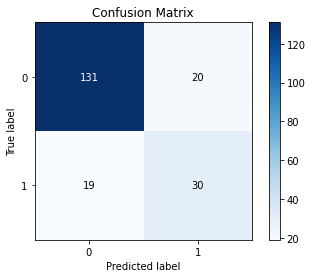

In [512]:
# xgboost result
skplt.metrics.plot_confusion_matrix(y_test, xgb_pred);

Dominand data prediction in True positive

**ROC-AUC**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.



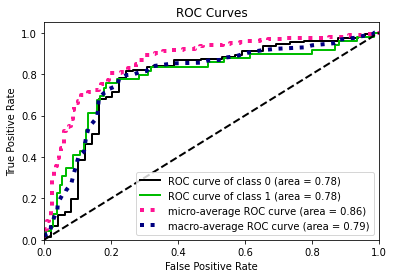

In [513]:
# xgboost result
skplt.metrics.plot_roc_curve(y_test_fraud, xgb_pred_proba);

# **Model Agnostic Methods**

In [514]:
# Inititate Explainer for best model

## initiate explainer for XGBoost model
churn_xgb_exp = dx.Explainer(xgb_clf, x_train_fraud, y_train_fraud, label = "XGBoost Interpretation")

Preparation of a new explainer is initiated

  -> data              : 800 rows 23 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 800 values
  -> model_class       : xgboost.sklearn.XGBClassifier (default)
  -> label             : XGBoost Interpretation
  -> predict function  : <function yhat_proba_default at 0x7f3e1852f320> will be used (default)
  -> predict function  : Accepts only pandas.DataFrame, numpy.ndarray causes problems.
  -> predicted values  : min = 0.0503, mean = 0.318, max = 0.711
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.711, mean = -0.0707, max = 0.95
  -> model_info        : package xgboost

A new explainer has been created!


# **Feature Importance**

In [515]:
# visualize permutation feature importance for XGBoost model
churn_xgb_exp.model_parts().plot()

Variable Incident severity memiliki dampak yang berpengaruh terhadap prediksi model dengan nilai drop-out loss 13%. sedangkan variable lain sangat kecil nilai drop-out loss nya.

# **Partial Dependence Plot**

In [517]:
# create partial dependence plot of XGBoost model
churn_xgb_exp.model_profile().plot()

Calculating ceteris paribus: 100%|██████████| 23/23 [00:02<00:00, 10.63it/s]


Variable yang memiliki dampak terhadap prediksi yaitu :
1. Insured Education level, memiliki dampak yang signifika dari 0.3 menjadi 0.35 (kenaikan sebesar 0.05)
2. Insured hobbies, memiliki dampak yang signifikan dari 0.35 turun menjadi 0.3
3. Insured rellationship, memiliki dampak yang signifikan karena adanya kenaikan yang significant dari 2.8 menjadi 3.9 (kenaikan sebesar 1.1)
4. Incident severity, memiliki dampak yang signifikan dengan nilai prediksi 0.45 turun menjadi 0.1
5. author_contract, memiliki dampak yang signifikan dari niali 0.29 menjadi 0.35

# **Local Interpretable Model-Agnostic Explanation**

In [526]:
# fit model no training data
xgb = XGBClassifier(
    random_state = 1000, grow_policy='depthwise', learning_rate=0.01, max_depth=10, n_estimators=10
)
#fit model
xgb.fit(x_train_fraud.values, y_train_fraud.values)

#predict
pred_result = xgb.predict(x_test_fraud.values)
pred_proba_result = xgb.predict_proba(x_test_fraud.values)

In [527]:
# define Random Forest explainer with lime module
lime_explainer = LimeTabularExplainer(
    x_train_fraud.values,
    feature_names = x_train_fraud.columns.tolist(),
    class_names = ['fraud', 'not fraud'],
    discretize_continuous = True,
    verbose = True
)

In [533]:
policy_number_235220 = x_train_fraud.iloc[97]
policy_number_527945 = x_train_fraud.iloc[77]
policy_number_605100 = x_train_fraud.iloc[745]

In [ ]:
# explain Random Forest prediction for user_id: 23976
#lime_explainer.explain_instance(policy_number_235220, xgb_pred_proba).show_in_notebook(show_table=True)

In [532]:
# explain Random Forest prediction for user_id: 23976

lime_explainer.explain_instance(policy_number_235220, xgb.predict_proba).show_in_notebook(show_table=True)

Intercept 0.4862643152092512
Prediction_local [0.47006304]
Right: 0.46026543


In [534]:
lime_explainer.explain_instance(policy_number_527945, xgb.predict_proba).show_in_notebook(show_table=True)

Intercept 0.4822376804860883
Prediction_local [0.46992911]
Right: 0.46085835


In [535]:
lime_explainer.explain_instance(policy_number_605100, xgb.predict_proba).show_in_notebook(show_table=True)

Intercept 0.46137763797365766
Prediction_local [0.52139]
Right: 0.53840137
